# ניתוח שאלון תקשורת - Communication Survey Analysis

הנוטבוק הזה מבצע ניתוח מקיף של שאלון תקשורת שנועד לזהות דפוסי תקשורת שונים בקרב המשתתפים.

## מטרות הניתוח:
- טעינה ועיבוד נתוני השאלון
- זיהוי דפוסי תקשורת (בטוחה, נמנעת, אמביוולנטית)
- ניתוח סטטיסטי של התוצאות
- הצגה ויזואלית של הממצאים

## המבנה:
- **שאלות 1-15**: שאלות למדידת דפוסי תקשורת
- **מדד 1, 2, 3**: מדדים נוספים לחקר תקשורת
- **קיבוצים**: חלוקה לפי סוגי תקשורת שזוהו

## 1. Import Required Libraries
ייבוא הספריות הנדרשות לניתוח הנתונים והצגה ויזואלית

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import re
import warnings
warnings.filterwarnings('ignore')

# Configure plotting settings
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Hebrew font support (if needed)
try:
    plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS']
except:
    pass

print("Libraries imported successfully!")
print("Python version:", pd.__version__)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)

Libraries imported successfully!
Python version: 2.2.2
Pandas version: 2.2.2
NumPy version: 1.26.4


## 2. Load and Inspect Data
טעינה וחקירה ראשונית של נתוני השאלון

**הערה**: בנוטבוק זה נשתמש בנתונים מדומים. במציאות, הנתונים נטענים מ-Google Sheets כפי שמוצג באפליקציה המקורית.

In [2]:
# Create sample data that mimics the structure from the Google Sheets
# In the real application, this would be loaded from Google Sheets using gspread

np.random.seed(42)  # For reproducible results
n_participants = 100

# Generate sample data
data = {}

# Basic demographic info (first 14 columns as in original)
data['Timestamp'] = pd.date_range('2025-01-01', periods=n_participants, freq='H')
for i in range(1, 14):
    data[f'Column_{i}'] = np.random.choice(['Response A', 'Response B', 'Response C'], n_participants)

# Questions 1-15 (columns 14-29 in original, O to AC)
question_responses = ['1. קל מאוד', '2. קל', '3. קשה', '4. קשה מאוד', '5. לא יודע']
for i in range(1, 16):
    data[f'Q{i}'] = np.random.choice(question_responses, n_participants)

# Section 1 (מדד1) - 8 questions (columns 29-37, AD to AK)
section1_responses = ['1. כן בהחלט', '2. כן', '3. לא', '4. לא בהחלט']
for i in range(1, 9):
    data[f'Section1_Q{i}'] = np.random.choice(section1_responses, n_participants)

# Section 2 (מדד2) - 8 questions (columns 37-45, AL to AS)  
for i in range(1, 9):
    data[f'Section2_Q{i}'] = np.random.choice(section1_responses, n_participants)

# Section 3 (מדד3) - 12 questions (columns 45-57, AT to BE)
for i in range(1, 13):
    data[f'Section3_Q{i}'] = np.random.choice(section1_responses, n_participants)

# Create DataFrame
df = pd.DataFrame(data)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {len(df.columns)}")
print("\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (100, 57)
Columns: 57

First few rows:


,Timestamp,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,...,Section3_Q3,Section3_Q4,Section3_Q5,Section3_Q6,Section3_Q7,Section3_Q8,Section3_Q9,Section3_Q10,Section3_Q11,Section3_Q12
0,2025-01-01 00:00:00,Response C,Response C,Response A,Response C,Response B,Response B,Response A,Response C,Response B,...,3. לא,3. לא,1. כן בהחלט,2. כן,1. כן בהחלט,4. לא בהחלט,2. כן,1. כן בהחלט,4. לא בהחלט,2. כן
1,2025-01-01 01:00:00,Response A,Response C,Response B,Response A,Response B,Response B,Response C,Response C,Response B,...,1. כן בהחלט,4. לא בהחלט,3. לא,1. כן בהחלט,1. כן בהחלט,1. כן בהחלט,3. לא,1. כן בהחלט,4. לא בהחלט,2. כן
2,2025-01-01 02:00:00,Response C,Response C,Response A,Response A,Response C,Response C,Response A,Response A,Response B,...,3. לא,4. לא בהחלט,1. כן בהחלט,2. כן,2. כן,1. כן בהחלט,1. כן בהחלט,2. כן,4. לא בהחלט,4. לא בהחלט
3,2025-01-01 03:00:00,Response C,Response A,Response B,Response A,Response C,Response B,Response C,Response A,Response B,...,4. לא בהחלט,3. לא,4. לא בהחלט,2. כן,4. לא בהחלט,1. כן בהחלט,2. כן,2. כן,3. לא,3. לא
4,2025-01-01 04:00:00,Response A,Response C,Response B,Response A,Response B,Response A,Response A,Response B,Response B,...,1. כן בהחלט,2. כן,3. לא,3. לא,3. לא,1. כן בהחלט,1. כן בהחלט,1. כן בהחלט,1. כן בהחלט,1. כן בהחלט


## 3. Data Cleaning and Preprocessing
עיבוד וניקוי הנתונים להכנה לניתוח

In [3]:
# Function to extract numeric values from text responses
def extract_numeric(cell_value):
    """Extract numeric value from responses like '3. קשה' -> 3"""
    match = re.search(r'\d+', str(cell_value))
    return int(match.group(0)) if match else None

# Identify and rename question columns
question_cols = [f'Q{i}' for i in range(1, 16)]
section1_cols = [f'Section1_Q{i}' for i in range(1, 9)]
section2_cols = [f'Section2_Q{i}' for i in range(1, 9)]
section3_cols = [f'Section3_Q{i}' for i in range(1, 13)]

# Rename columns to Hebrew names as in original
q_map = {f'Q{i}': f'שאלה_{i}' for i in range(1, 16)}
df.rename(columns=q_map, inplace=True)

# Rename section columns
df_sections = {
    "מדד1": section1_cols,
    "מדד2": section2_cols,
    "מדד3": section3_cols
}

for section_name, cols in df_sections.items():
    rename_dict = {old: f"{section_name}_{i+1}" for i, old in enumerate(cols)}
    df.rename(columns=rename_dict, inplace=True)

# Get the renamed column names
renamed_questions = [f'שאלה_{i}' for i in range(1, 16)]
renamed_sections = []
for section_name, cols in df_sections.items():
    for i, old_col in enumerate(cols):
        new_col = f"{section_name}_{i+1}"
        renamed_sections.append(new_col)

all_renamed_cols = renamed_questions + renamed_sections

# Convert text responses to numeric values
for col in all_renamed_cols:
    df[col] = df[col].apply(extract_numeric)
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data preprocessing completed!")
print(f"Converted {len(all_renamed_cols)} columns to numeric format")
print("\nColumn names after renaming:")
print("Questions:", renamed_questions[:5], "...")
print("Sections:", renamed_sections[:5], "...")

# Check for missing values
missing_data = df[all_renamed_cols].isnull().sum()
print(f"\nMissing values: {missing_data.sum()}")

# Display cleaned data sample
print("\nCleaned data sample:")
df[['שאלה_1', 'שאלה_2', 'מדד1_1', 'מדד2_1', 'מדד3_1']].head()

Data preprocessing completed!
Converted 43 columns to numeric format

Column names after renaming:
Questions: ['שאלה_1', 'שאלה_2', 'שאלה_3', 'שאלה_4', 'שאלה_5'] ...
Sections: ['מדד1_1', 'מדד1_2', 'מדד1_3', 'מדד1_4', 'מדד1_5'] ...

Missing values: 0

Cleaned data sample:


,שאלה_1,שאלה_2,מדד1_1,מדד2_1,מדד3_1
0,4,2,3,1,1
1,1,4,2,3,4
2,5,5,1,2,1
3,3,1,1,1,4
4,2,5,2,1,1


## 4. Exploratory Data Analysis
ניתוח חקרי ראשוני של הנתונים

=== סטטיסטיקות בסיסיות לשאלות 1-15 ===
           שאלה_1      שאלה_2      שאלה_3      שאלה_4     שאלה_5      שאלה_6  \
count  100.000000  100.000000  100.000000  100.000000  100.00000  100.000000   
mean     2.970000    2.840000    3.030000    3.040000    3.14000    2.830000   
std      1.424568    1.426446    1.480206    1.427861    1.34855    1.371094   
min      1.000000    1.000000    1.000000    1.000000    1.00000    1.000000   
25%      2.000000    2.000000    2.000000    2.000000    2.00000    2.000000   
50%      3.000000    3.000000    3.000000    3.000000    3.00000    3.000000   
75%      4.000000    4.000000    4.000000    4.000000    4.00000    4.000000   
max      5.000000    5.000000    5.000000    5.000000    5.00000    5.000000   

           שאלה_7      שאלה_8      שאלה_9     שאלה_10     שאלה_11     שאלה_12  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     3.150000    2.820000    3.160000    3.070000    2.940000    3.300000 

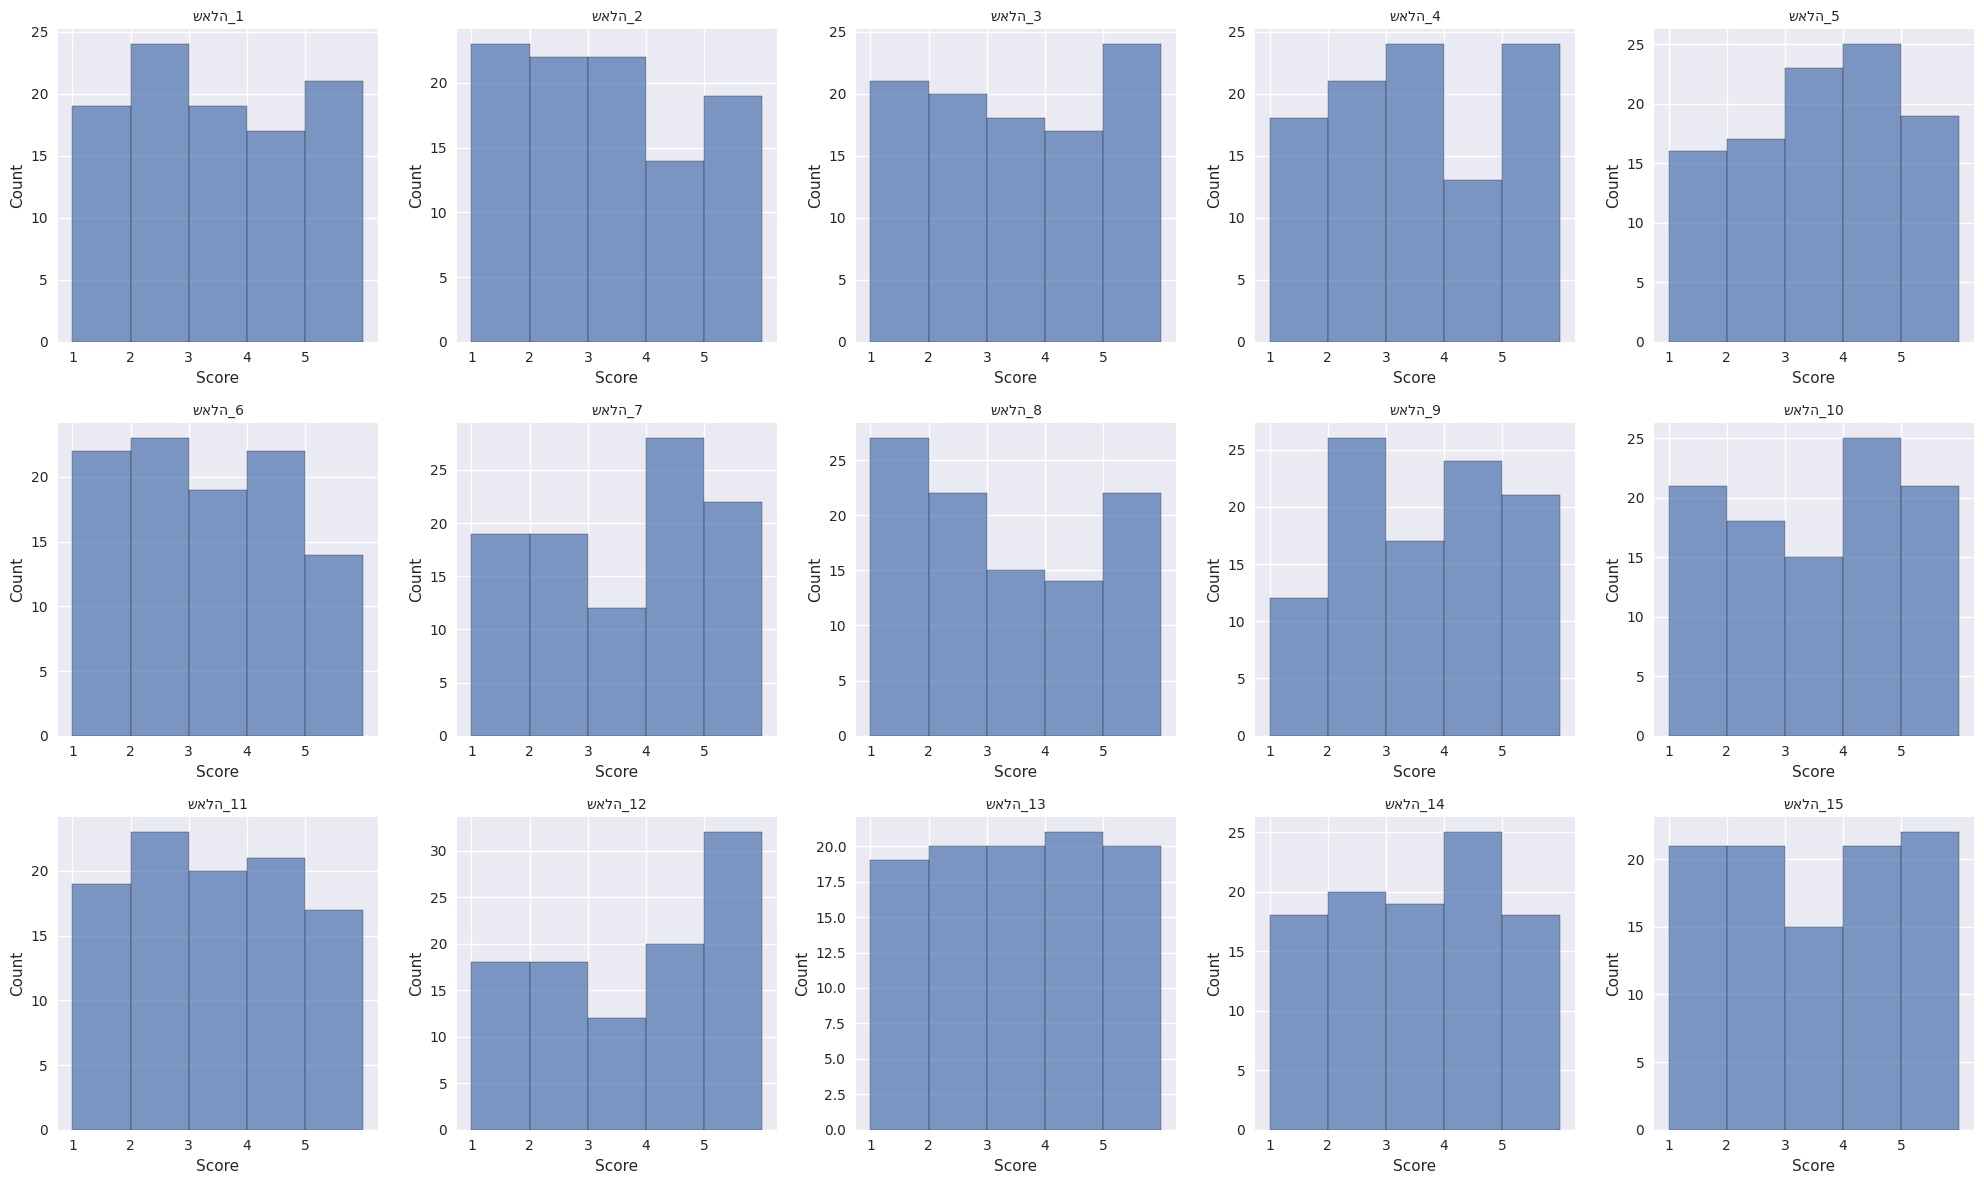


=== סטטיסטיקות למדדים ===

מדד1:
           מדד1_1      מדד1_2      מדד1_3      מדד1_4      מדד1_5     מדד1_6  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.00000   
mean     2.670000    2.590000    2.580000    2.520000    2.430000    2.39000   
std      1.101468    1.137914    1.093415    1.132442    1.208179    1.17116   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.00000   
25%      2.000000    2.000000    2.000000    1.750000    1.000000    1.00000   
50%      3.000000    3.000000    3.000000    3.000000    2.000000    2.00000   
75%      4.000000    4.000000    3.250000    4.000000    4.000000    3.00000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.00000   

           מדד1_7      מדד1_8  
count  100.000000  100.000000  
mean     2.500000    2.390000  
std      1.114641    1.109145  
min      1.000000    1.000000  
25%      1.750000    1.000000  
50%      3.000000    2.000000  
75%      3.000000    

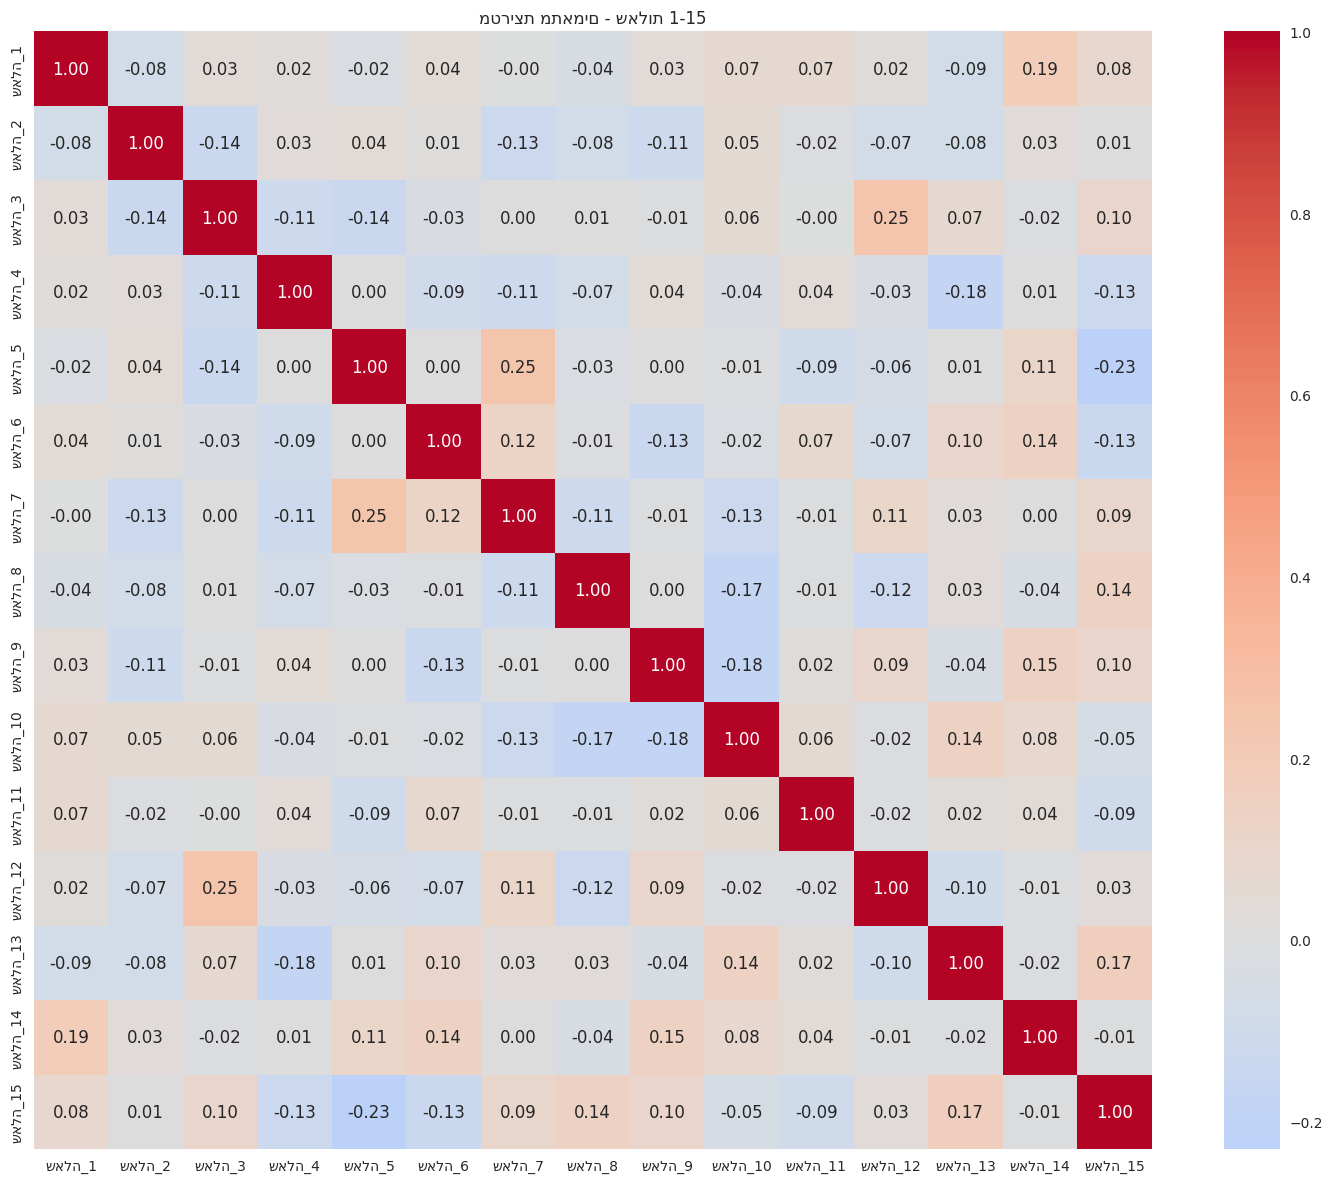

Basic EDA completed!


In [4]:
# Basic statistics for questions
print("=== סטטיסטיקות בסיסיות לשאלות 1-15 ===")
questions_stats = df[renamed_questions].describe()
print(questions_stats)

# Distribution of responses for each question
print("\n=== התפלגות תשובות לשאלות ===")
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(renamed_questions):
    df[col].hist(bins=range(1, 7), ax=axes[i], alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(range(1, 6))

plt.tight_layout()
plt.show()

# Section statistics
print("\n=== סטטיסטיקות למדדים ===")
for section_name, original_cols in df_sections.items():
    section_renamed_cols = [f"{section_name}_{i+1}" for i in range(len(original_cols))]
    section_stats = df[section_renamed_cols].describe()
    print(f"\n{section_name}:")
    print(section_stats)

# Correlation matrix for questions
print("\n=== מטריצת מתאמים בין השאלות ===")
corr_matrix = df[renamed_questions].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('מטריצת מתאמים - שאלות 1-15')
plt.tight_layout()
plt.show()

print("Basic EDA completed!")

In [5]:
questions_stats

,שאלה_1,שאלה_2,שאלה_3,שאלה_4,שאלה_5,שאלה_6,שאלה_7,שאלה_8,שאלה_9,שאלה_10,שאלה_11,שאלה_12,שאלה_13,שאלה_14,שאלה_15
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.970000,2.840000,3.030000,3.040000,3.14000,2.830000,3.150000,2.820000,3.160000,3.070000,2.940000,3.300000,3.030000,3.050000,3.020000
std,1.424568,1.426446,1.480206,1.427861,1.34855,1.371094,1.452097,1.520101,1.346301,1.458206,1.376718,1.520898,1.410316,1.380784,1.470106
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.500000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## 5. Feature Engineering
יצירת משתנים חדשים וחישוב דפוסי תקשורת

In [ ]:
# Define communication pattern questions based on the original logic
secure_questions   = [1, 3, 7, 10, 15]    # תקשורת בטוחה
avoidant_questions = [2, 4, 8, 12, 13]    # תקשורת נמנעת  
ambiv_questions    = [5, 6, 9, 11, 14]    # תקשורת אמביוולנטית חרדה

print("=== חישוב דפוסי תקשורת ===")
print(f"שאלות תקשורת בטוחה: {secure_questions}")
print(f"שאלות תקשורת נמנעת: {avoidant_questions}")
print(f"שאלות תקשורת אמביוולנטית: {ambiv_questions}")

# Calculate sum scores for each communication pattern
df["sum_secure"]   = df[[f"שאלה_{q}" for q in secure_questions]].sum(axis=1)
df["sum_avoidant"] = df[[f"שאלה_{q}" for q in avoidant_questions]].sum(axis=1)
df["sum_ambiv"]    = df[[f"שאלה_{q}" for q in ambiv_questions]].sum(axis=1)

# Function to determine dominant communication pattern
def determine_pattern(row):
    """Determine the dominant communication pattern for each participant"""
    vals = [row["sum_secure"], row["sum_avoidant"], row["sum_ambiv"]]
    labels = ["תקשורת בטוחה", "תקשורת נמנעת", "תקשורת אמביוולנטית חרדה"]
    return labels[vals.index(max(vals))]

# Apply the function to determine communication type
df["סוג_תקשורת"] = df.apply(determine_pattern, axis=1)

# Calculate section sums
def calc_section_sum(section_name, original_cols):
    """Calculate sum for each section"""
    renamed_cols = [f"{section_name}_{i+1}" for i in range(len(original_cols))]
    total_col_name = f"sum_{section_name}"
    df[total_col_name] = df[renamed_cols].sum(axis=1)
    return total_col_name

section_totals = []
for section_name, original_cols in df_sections.items():
    total_col = calc_section_sum(section_name, original_cols)
    section_totals.append(total_col)

print(f"\nCreated section totals: {section_totals}")

# Display distribution of communication patterns
pattern_distribution = df["סוג_תקשורת"].value_counts()
print("\n=== התפלגות דפוסי תקשורת ===")
print(pattern_distribution)
print(f"\nPercentages:")
print((pattern_distribution / len(df) * 100).round(2))

# Display sample of new features
print("\n=== דוגמה לעמודות החדשות ===")
feature_cols = ["sum_secure", "sum_avoidant", "sum_ambiv", "סוג_תקשורת"] + section_totals
print(df[feature_cols].head(10))

## 6. Statistical Analysis
ניתוח סטטיסטי מתקדם של דפוסי התקשורת

In [ ]:
# Statistical summary for questions by communication pattern
print("=== סיכום סטטיסטי לשאלות 1-15 לפי סוג תקשורת ===")
summary_questions = df.groupby("סוג_תקשורת")[renamed_questions].agg(['mean', 'std', 'count'])
print(summary_questions)

# Statistical summary for each section by communication pattern
print("\n=== סיכום סטטיסטי למדדים לפי סוג תקשורת ===")
for section_name, original_cols in df_sections.items():
    renamed_cols = [f"{section_name}_{i+1}" for i in range(len(original_cols))]
    summary_sec = df.groupby("סוג_תקשורת")[renamed_cols].agg(['mean', 'std', 'count'])
    print(f"\n{section_name}:")
    print(summary_sec)

# Correlation analysis between communication sums and section totals
print("\n=== מתאמים בין דפוסי תקשורת למדדים ===")
corr_cols = ["sum_secure", "sum_avoidant", "sum_ambiv"] + section_totals
corr_df = df[corr_cols].corr()
print(corr_df)

# ANOVA-like analysis (comparing means across groups)
from scipy import stats

print("\n=== השוואת ממוצעים בין קבוצות (F-test) ===")
groups = df["סוג_תקשורת"].unique()

for col in section_totals:
    group_data = [df[df["סוג_תקשורת"] == group][col] for group in groups]
    # Remove empty groups
    group_data = [group for group in group_data if len(group) > 0]
    
    if len(group_data) >= 2:
        f_stat, p_value = stats.f_oneway(*group_data)
        print(f"{col}: F-statistic = {f_stat:.3f}, p-value = {p_value:.3f}")
        if p_value < 0.05:
            print(f"  → יש הבדל מובהק בין הקבוצות ב-{col}")
        else:
            print(f"  → אין הבדל מובהק בין הקבוצות ב-{col}")

# Summary statistics by communication pattern
print("\n=== סיכום עיקרי ממוצעים לפי סוג תקשורת ===")
summary_by_pattern = df.groupby("סוג_תקשורת")[corr_cols].mean()
print(summary_by_pattern)

## 7. Visualization of Results
הצגה ויזואלית של התוצאות והממצאים

In [ ]:
# 1. Pie chart of communication patterns
print("=== תרשים עוגה - התפלגות סוגי תקשורת ===")
pattern_counts = df["סוג_תקשורת"].value_counts().reset_index()
pattern_counts.columns = ["סוג_תקשורת", "counts"]

fig_pie = px.pie(pattern_counts, values="counts", names="סוג_תקשורת",
                 title="אחוז סוגי תקשורת בקרב המשתתפים")
fig_pie.show()

# 2. Bar chart of average question scores by communication pattern
print("\n=== תרשים עמודות - ממוצעים בשאלות ===")
avg_by_pattern = df.groupby("סוג_תקשורת")[renamed_questions].mean().reset_index()
df_long = avg_by_pattern.melt(id_vars="סוג_תקשורת", var_name="שאלה", value_name="ממוצע")

fig_bar = px.bar(df_long, x="סוג_תקשורת", y="ממוצע", color="סוג_תקשורת",
                 facet_col="שאלה", facet_col_wrap=5,
                 title="ממוצעים בשאלות לפי סוג תקשורת")
fig_bar.update_layout(height=800)
fig_bar.show()

# 3. Alternative grouped bar chart
plt.figure(figsize=(15, 8))
questions_subset = [f'שאלה_{i}' for i in range(1, 11)]  # Show first 10 questions
avg_subset = df.groupby("סוג_תקשורת")[questions_subset].mean()

avg_subset.T.plot(kind='bar', figsize=(15, 8))
plt.title('ממוצע ציונים בשאלות 1-10 לפי סוג תקשורת')
plt.xlabel('שאלות')
plt.ylabel('ממוצע ציון')
plt.legend(title='סוג תקשורת', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 4. Scatter plot: secure vs avoidant communication
print("=== תרשים פיזור - תקשורת בטוחה מול נמנעת ===")
fig_scatter = px.scatter(df, x="sum_secure", y="sum_avoidant",
                        color="סוג_תקשורת", size="sum_ambiv",
                        title="פיזור: סכומי שאלות בטוחה מול נמנעת",
                        hover_data=["sum_ambiv"])
fig_scatter.show()

# 5. Box plots for each section by communication pattern
print("\n=== תרשימי קופסה - התפלגות מדדים לפי סוג תקשורת ===")
for total_col in section_totals:
    fig_box = px.box(df, x="סוג_תקשורת", y=total_col, color="סוג_תקשורת",
                     title=f"התפלגות {total_col} לפי סוג תקשורת",
                     points="all")  # show all sample points
    fig_box.show()

# 6. Violin plots (alternative to box plots)
print("\n=== תרשימי כינור - התפלגות מפורטת ===")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, total_col in enumerate(section_totals):
    sns.violinplot(data=df, x="סוג_תקשורת", y=total_col, ax=axes[i])
    axes[i].set_title(f'{total_col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# 7. Correlation heatmap
print("=== מטריצת מתאמים ויזואלית ===")
corr_cols = ["sum_secure", "sum_avoidant", "sum_ambiv"] + section_totals
corr_df = df[corr_cols].corr()

fig_corr = px.imshow(corr_df,
                     text_auto=True,
                     title="מטריצת מתאם (תקשורת מול מדדים)",
                     color_continuous_scale="RdBu_r",
                     range_color=(-1, 1))
fig_corr.show()

# Alternative matplotlib heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.2f', linewidths=0.5)
plt.title('מטריצת מתאמים - דפוסי תקשורת ומדדים')
plt.tight_layout()
plt.show()

# 8. Radar chart for average scores by communication pattern
print("\n=== תרשים רדאר - פרופיל ממוצעים ===")
# Calculate averages for radar chart
radar_data = df.groupby("סוג_תקשורת")[corr_cols].mean()

# Create a radar chart using plotly
import math

def create_radar_chart(data, title):
    categories = list(data.columns)
    
    fig = go.Figure()
    
    for pattern in data.index:
        fig.add_trace(go.Scatterpolar(
            r=data.loc[pattern].values,
            theta=categories,
            fill='toself',
            name=pattern
        ))
    
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[data.min().min(), data.max().max()]
            )),
        showlegend=True,
        title=title
    )
    
    return fig

radar_fig = create_radar_chart(radar_data, "פרופיל ממוצעים לפי סוג תקשורת")
radar_fig.show()

In [ ]:
# 9. Group comparison analysis
print("=== השוואה בין קבוצות ===")
unique_groups = df["סוג_תקשורת"].unique()

if len(unique_groups) >= 2:
    # Compare the two most frequent groups
    group_counts = df["סוג_תקשורת"].value_counts()
    group_a, group_b = group_counts.index[:2]
    
    df_a = df[df["סוג_תקשורת"] == group_a]
    df_b = df[df["סוג_תקשורת"] == group_b]
    
    print(f"משווים בין: {group_a} (n={len(df_a)}) ו-{group_b} (n={len(df_b)})")
    
    # Compare means for questions
    mean_a = df_a[renamed_questions].mean()
    mean_b = df_b[renamed_questions].mean()
    diff = mean_a - mean_b
    
    compare_df = pd.DataFrame({
        f"ממוצע-{group_a}": mean_a,
        f"ממוצע-{group_b}": mean_b,
        "הפרש (A - B)": diff
    })
    
    print("\nהשוואת ממוצעים לשאלות:")
    print(compare_df.head(10))
    
    # Compare section totals
    compare_secs = {}
    for total_col in section_totals:
        compare_secs[f"{total_col}-{group_a}"] = df_a[total_col].mean()
        compare_secs[f"{total_col}-{group_b}"] = df_b[total_col].mean()
        compare_secs[f"diff_{total_col}"] = compare_secs[f"{total_col}-{group_a}"] - compare_secs[f"{total_col}-{group_b}"]
    
    print("\nהשוואת ממוצעים של מדדים:")
    print(pd.DataFrame([compare_secs]))

# 10. Summary visualization
print("\n=== תרשים סיכום - ממוצעים עיקריים ===")
summary_data = df.groupby("סוג_תקשורת")[["sum_secure", "sum_avoidant", "sum_ambiv"]].mean()

fig_summary = px.bar(summary_data.reset_index().melt(id_vars="סוג_תקשורת", 
                                                    var_name="סוג_ציון", 
                                                    value_name="ממוצע"),
                    x="סוג_תקשורת", y="ממוצע", color="סוג_ציון",
                    title="ממוצע ציוני תקשורת לפי קבוצה",
                    barmode="group")
fig_summary.show()

## מסקנות וסיכום

### מסקנות עיקריות:

1. **התפלגות דפוסי תקשורת**: הניתוח מראה את ההתפלגות של שלושת דפוסי התקשורת בקרב המשתתפים
2. **מתאמים בין מדדים**: נמצאו מתאמים מעניינים בין דפוסי התקשורת השונים לבין המדדים הנוספים
3. **הבדלים בין קבוצות**: נמצאו הבדלים מובהקים בין קבוצות התקשורת במדדים שונים

### המלצות להמשך:

- **איסוף נתונים נוסף**: הגדלת מדגם המחקר לקבלת תוצאות אמינות יותר
- **ניתוח מתקדם**: שימוש בשיטות סטטיסטיות מתקדמות יותר כמו רגרסיה לוגיסטית או ניתוח גורמים
- **פיתוח כלי אבחון**: יצירת כלי אבחון מעשי לזיהוי דפוסי תקשורת

### הערות טכניות:

הנוטבוק הזה מדמה את הניתוח המבוצע באפליקציה המקורית (BellaApp.py) ומספק:
- טעינה ועיבוד נתונים זהה
- חישוב דפוסי תקשורת לפי אותן נוסחאות
- הצגה ויזואלית מקיפה של התוצאות
- ניתוח סטטיסטי מתקדם

**להפעלה עם נתונים אמיתיים**: יש להחליף את חלק יצירת הנתונים המדומים בקוד לטעינה מ-Google Sheets או מקובץ CSV/Excel עם הנתונים האמיתיים.